<a href="https://colab.research.google.com/github/renqiu-chen/INFO6105-Notebooks/blob/main/info6105_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
url='https://raw.githubusercontent.com/renqiu-chen/INFO6105-Notebooks/main/high_diamond_ranked_10min.csv'

# Import H2O

In [3]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 5.5 MB/s eta 0:00:00


In [5]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [6]:
min_mem_size=6 
run_time=222

In [7]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [8]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:27208..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsz26zc4p
  JVM stdout: /tmp/tmpsz26zc4p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsz26zc4p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:27208
Connecting to H2O server at http://127.0.0.1:27208 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_de7qzd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Import Data

In [9]:
data = h2o.import_file(url)
df = data
df['blueWins'] = df['blueWins'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Studying the Data

In [10]:
df.describe()

Rows:9879
Cols:40

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
type,int,enum,int,int,int,int,int,int,int,int,int,int,int,real,int,int,int,int,int,real,real,int,int,int,int,int,int,int,int,int,int,int,real,int,int,int,int,int,real,real
mins,4295358071.0,,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10730.0,4.6,10098.0,90.0,0.0,-10830.0,-9333.0,9.0,1073.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11212.0,4.8,10465.0,107.0,4.0,-11467.0,-8348.0,10.7,1121.2
mean,4500084044.84553,,22.288288288288296,2.824881060836116,0.5048081789654824,6.183925498532242,6.137665755643285,6.6451057799372375,0.5499544488308531,0.3619799574855755,0.18797449134527786,0.05142220872557952,16503.455511691474,6.9160036440935295,17928.11013260452,216.6995647332727,50.509666970341115,14.414110739953466,-33.620305698957395,21.66995647332727,1650.3455511691461,22.36795222188481,2.7231501164085428,0.49519182103451764,6.137665755643285,6.183925498532242,6.662111549751999,0.5731349326854941,0.41309849175017715,0.16003644093531735,0.043020548638526175,16489.041400951523,6.92531632756352,17961.730438303468,217.3492256301246,51.31308836926817,-14.414110739953466,33.620305698957395,21.734922563012443,1648.9041400951512
maxs,4527990640.0,,250.0,27.0,1.0,22.0,22.0,29.0,2.0,1.0,1.0,4.0,23701.0,8.0,22224.0,283.0,92.0,11467.0,8348.0,28.3,2370.1,276.0,24.0,1.0,22.0,22.0,28.0,2.0,1.0,1.0,2.0,22732.0,8.2,22269.0,289.0,92.0,10830.0,9333.0,28.9,2273.2
sigma,27573278.490915924,,18.019176515802513,2.1749983822222054,0.5000021878367946,3.011027975365151,2.933817709182217,4.064519899696563,0.6255265026337926,0.4805973867496529,0.39071157453780553,0.24436916855721588,1535.4466363146503,0.3051458222812844,1200.5237643565185,21.858437375154118,9.898282161842513,2453.3491794034267,1920.370438180796,2.1858437375154116,153.54466363146497,18.457426796153253,2.1383561145619523,0.5000021878367946,2.933817709182217,3.011027975365151,4.060612445329824,0.6264816421399118,0.4924151420463986,0.36665840643525954,0.21689993728200216,1490.8884057212776,0.3053114187334411,1198.5839120078467,21.91166802746209,10.027884879893213,2453.3491794034267,1920.370438180796,2.1911668027462095,149.08884057212776
zeros,0,,0,745,4892,63,72,217,5156,6303,8022,9415,0,0,0,0,2,2,1,0,0,0,785,4987,72,63,235,4947,5798,8298,9483,0,0,0,0,0,2,1,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,4519157822.0,0,28.0,2.0,1.0,9.0,6.0,11.0,0.0,0.0,0.0,0.0,17210.0,6.6,17039.0,195.0,36.0,643.0,-8.0,19.5,1721.0,15.0,6.0,0.0,6.0,9.0,8.0,0.0,0.0,0.0,0.0,16567.0,6.8,17047.0,197.0,55.0,-643.0,8.0,19.7,1656.7
1,4523371949.0,0,12.0,1.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,14712.0,6.6,16265.0,174.0,43.0,-2908.0,-1173.0,17.4,1471.2,12.0,1.0,1.0,5.0,5.0,2.0,2.0,1.0,1.0,1.0,17620.0,6.8,17438.0,240.0,52.0,2908.0,1173.0,24.0,1762.0
2,4521474530.0,0,15.0,0.0,0.0,7.0,11.0,4.0,1.0,1.0,0.0,0.0,16113.0,6.4,16221.0,186.0,46.0,-1172.0,-1033.0,18.6,1611.3,15.0,3.0,1.0,11.0,7.0,14.0,0.0,0.0,0.0,0.0,17285.0,6.8,17254.0,203.0,28.0,1172.0,1033.0,20.3,1728.5


In [11]:
df.types

{'gameId': 'int',
 'blueWins': 'enum',
 'blueWardsPlaced': 'int',
 'blueWardsDestroyed': 'int',
 'blueFirstBlood': 'int',
 'blueKills': 'int',
 'blueDeaths': 'int',
 'blueAssists': 'int',
 'blueEliteMonsters': 'int',
 'blueDragons': 'int',
 'blueHeralds': 'int',
 'blueTowersDestroyed': 'int',
 'blueTotalGold': 'int',
 'blueAvgLevel': 'real',
 'blueTotalExperience': 'int',
 'blueTotalMinionsKilled': 'int',
 'blueTotalJungleMinionsKilled': 'int',
 'blueGoldDiff': 'int',
 'blueExperienceDiff': 'int',
 'blueCSPerMin': 'real',
 'blueGoldPerMin': 'real',
 'redWardsPlaced': 'int',
 'redWardsDestroyed': 'int',
 'redFirstBlood': 'int',
 'redKills': 'int',
 'redDeaths': 'int',
 'redAssists': 'int',
 'redEliteMonsters': 'int',
 'redDragons': 'int',
 'redHeralds': 'int',
 'redTowersDestroyed': 'int',
 'redTotalGold': 'int',
 'redAvgLevel': 'real',
 'redTotalExperience': 'int',
 'redTotalMinionsKilled': 'int',
 'redTotalJungleMinionsKilled': 'int',
 'redGoldDiff': 'int',
 'redExperienceDiff': 'int'

In [12]:
df.shape

(9879, 40)

In [13]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [14]:
print(df_train.shape)
print(df_test.shape)

(7859, 40)
(2020, 40)


In [15]:
#Display all columns in X
X=df.columns
print(X)

['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


In [16]:
#Seperate Dependent variable from Independent variable
y_classification ='blueWins'
X.remove(y_classification) 
print(X)

['gameId', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


In [17]:
dfpd=h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# H20 AutoML Execution

In [18]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)   

In [19]:
#pass the data through H20AutoML
aml.train(x=X,y=y_classification,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230219_222054


GLM Model: summary
    family    link    regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.004826 )  nlambda = 30, lambda.max = 25.568, lambda.min = 0.004826, lambda.1se = 0.2181  39                            39                             36                      AutoML_1_20230219_222054_training_py_3_sid_9e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.177061997222837
RMSE: 0.42078735392456484
LogLoss: 0.5273280160710441
AUC: 0.8117714298296856
AUCPR: 0.8094171073809594
Gini: 0.6235428596593713
Null degrees of freedom: 7858
Residual degrees of freedom: 7819
Null deviance: 10894.831269964925
Residual deviance: 8288.54175660467
AIC: 8368.54175660467

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3775063722033633
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2311  1629  0.4135   (1629.0/3940.0)
1      591   3328  0.1508   (591.0/3919.0)
Total  2902  4957  0.2825   (2220.0/7859.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.377506     0.749887  247
max f2                       0.129955     0.850422  353
max f0point5                 0.623866     0.742859  146
max accuracy                 0.522878     0.731645  189
max precision                0.995603     1         0
max recall                   0.0403569    1         389
max specificity              0.995603     1         0
max absolute_mcc             0.522878     0.463673  189
max min_per_class_accuracy   0.501449     0.730544  198
max mean_per_class_accuracy  0.522878     0.731585  189
max tns                      0.995603     3940      0
max fns                      0.995603     3916      0
max fps                      0.00358898   3940      399
max tps                      0.0403569    3919      389
max tnr                      0.995603     1         0
max fnr                      0.995603     0.999234  0
max fpr                      0.00358898   1         399
max tpr                      0.0403569    1         389

Gains/Lift Table: Avg response rate: 49.87 %, avg score: 49.87 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100522                   0.97162            1.97997   1.97997            0.987342         0.98263    0.987342                    0.98263             0.019903        0.019903                   97.9974   97.9974            0.0196492
2        0.0201043                   0.956058           1.97997   1.97997            0.987342         0.963869   0.987342                    0.97325             0.019903        0.0398061                  97.9974   97.9974            0.0392985
3        0.0300293                   0.944297           1.90252   1.95437            0.948718         0.949408   0.974576                    0.96537             0.0188824       0.0586884                  90.252

In [20]:
print(aml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
GLM_1_AutoML_1_20230219_222054                           0.808928   0.530906  0.805794                0.291329  0.422391  0.178414
StackedEnsemble_BestOfFamily_3_AutoML_1_20230219_222054  0.80874    0.531147  0.805367                0.284508  0.422448  0.178463
StackedEnsemble_BestOfFamily_1_AutoML_1_20230219_222054  0.80871    0.531049  0.805585                0.285281  0.422458  0.178471
StackedEnsemble_AllModels_1_AutoML_1_20230219_222054     0.808653   0.531236  0.805372                0.284781  0.42252   0.178523
StackedEnsemble_BestOfFamily_4_AutoML_1_20230219_222054  0.808612   0.531312  0.805665                0.28037   0.422514  0.178518
StackedEnsemble_AllModels_2_AutoML_1_20230219_222054     0.808566   0.531762  0.80435                 0.283004  0.422566  0.178562
StackedEnsemble_BestOfFamily_2_AutoML_1_20230219_222054  0.808446   0.531422  0.804

In [21]:
data=pd.read_csv(url)
Multic=h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.as_data_frame().values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,gameId,1.007735e+00
1,blueWins,1.391591e+00
2,blueWardsPlaced,1.027022e+00
3,blueWardsDestroyed,1.068598e+00
4,blueFirstBlood,7.402307e+03
5,blueKills,2.251800e+15
6,blueDeaths,1.125900e+15
7,blueAssists,3.770069e+00
8,blueEliteMonsters,inf
9,blueDragons,inf


Accordig to the VIF table, we can acknowledge that some varibles need to be dropped because they have Multicollinearity

In [49]:
import statsmodels.formula.api as smf #OLS model Library
data_pd=pd.read_csv(url)
data_pd=data_pd[['blueWins', 'blueAssists', 'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalJungleMinionsKilled', 'redAssists','redTowersDestroyed','redAvgLevel','redTotalJungleMinionsKilled']]
results = smf.logit('blueWins ~ blueAssists + blueTowersDestroyed + blueAvgLevel + blueTotalJungleMinionsKilled + redAssists + redTowersDestroyed + redAvgLevel + redTotalJungleMinionsKilled', data=data_pd).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.558884
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                 9879
Model:                          Logit   Df Residuals:                     9870
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.1937
Time:                        22:45:06   Log-Likelihood:                -5521.2
converged:                       True   LL-Null:                       -6847.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0720      0.894      0.081      0.936      -1.680       1.824
blueAssists                      0.0937      0.007     13.643      0.000       0.080       0.107
blueTowersDestroyed              0.5319      0.119      4.458      0.000       0.298       0.766
blueAvgLevel                     1.7126      0.100     17.148      0.000       1.517       1.908
blueTotalJungleMinionsKilled     0.0140      0.003      5.283      0.000       0.009       0.019
redAssists                      -0.0865      0.007    -12.647      0.000      -0.100      -0.073
redTowersDestroyed              -0.3995      0.127     -3.157      0.002      -0.648      -0.151
redAvgLevel                     -1.7838      0.101    -17.711      0.000      -1.981      -1.586
redTotalJungleMinionsKilled     -0.0064      0.003     -2.454      0.014      -0.012      -0.001
================================================================================================
"""

In [50]:
data_pd.corr()

,blueWins,blueAssists,blueTowersDestroyed,blueAvgLevel,blueTotalJungleMinionsKilled,redAssists,redTowersDestroyed,redAvgLevel,redTotalJungleMinionsKilled
blueWins,1.000000,0.276685,0.115566,0.357820,0.131445,-0.271047,-0.103696,-0.352127,-0.110994
blueAssists,0.276685,1.000000,0.123663,0.292661,-0.134023,-0.007481,-0.060880,-0.356928,-0.160915
blueTowersDestroyed,0.115566,0.123663,1.000000,0.124453,0.008165,-0.036254,0.011738,-0.204429,-0.038505
blueAvgLevel,0.357820,0.292661,0.124453,1.000000,0.371371,-0.366039,-0.183090,-0.228466,-0.013128
blueTotalJungleMinionsKilled,0.131445,-0.134023,0.008165,0.371371,1.000000,-0.169318,-0.048078,-0.013881,-0.026363
redAssists,-0.271047,-0.007481,-0.036254,-0.366039,-0.169318,1.000000,0.107425,0.277040,-0.130417
redTowersDestroyed,-0.103696,-0.060880,0.011738,-0.183090,-0.048078,0.107425,1.000000,0.113035,0.006374
redAvgLevel,-0.352127,-0.356928,-0.204429,-0.228466,-0.013881,0.277040,0.113035,1.000000,0.382009
redTotalJungleMinionsKilled,-0.110994,-0.160915,-0.038505,-0.013128,-0.026363,-0.130417,0.006374,0.382009,1.000000


Text(0.5, 1.0, 'Variable Correlation')

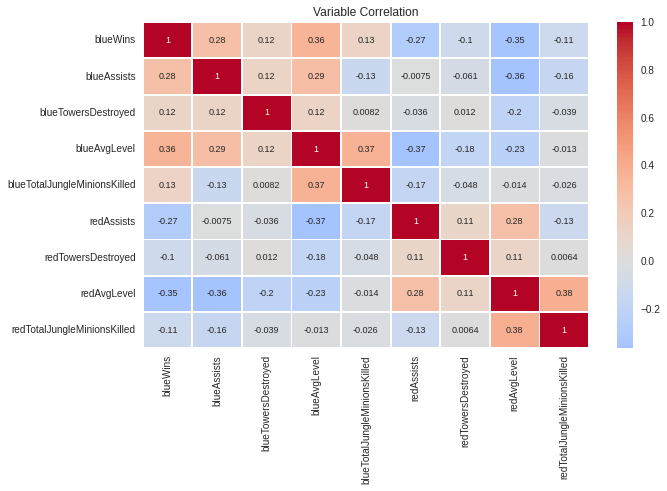

In [51]:
# Representing Matrix as a plot
from IPython.core.pylabtools import figsize

f, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    data_pd.corr(),
    center=0,
    linewidths=0.8,
    cmap="coolwarm",
    annot=True,
    annot_kws={"size": 9},
)
plt.title("Variable Correlation")

The heatmap show us the relation among these vairables, since the blue and red are opposite sides. So the red side vairables have inverse impact on the blueWins variable.

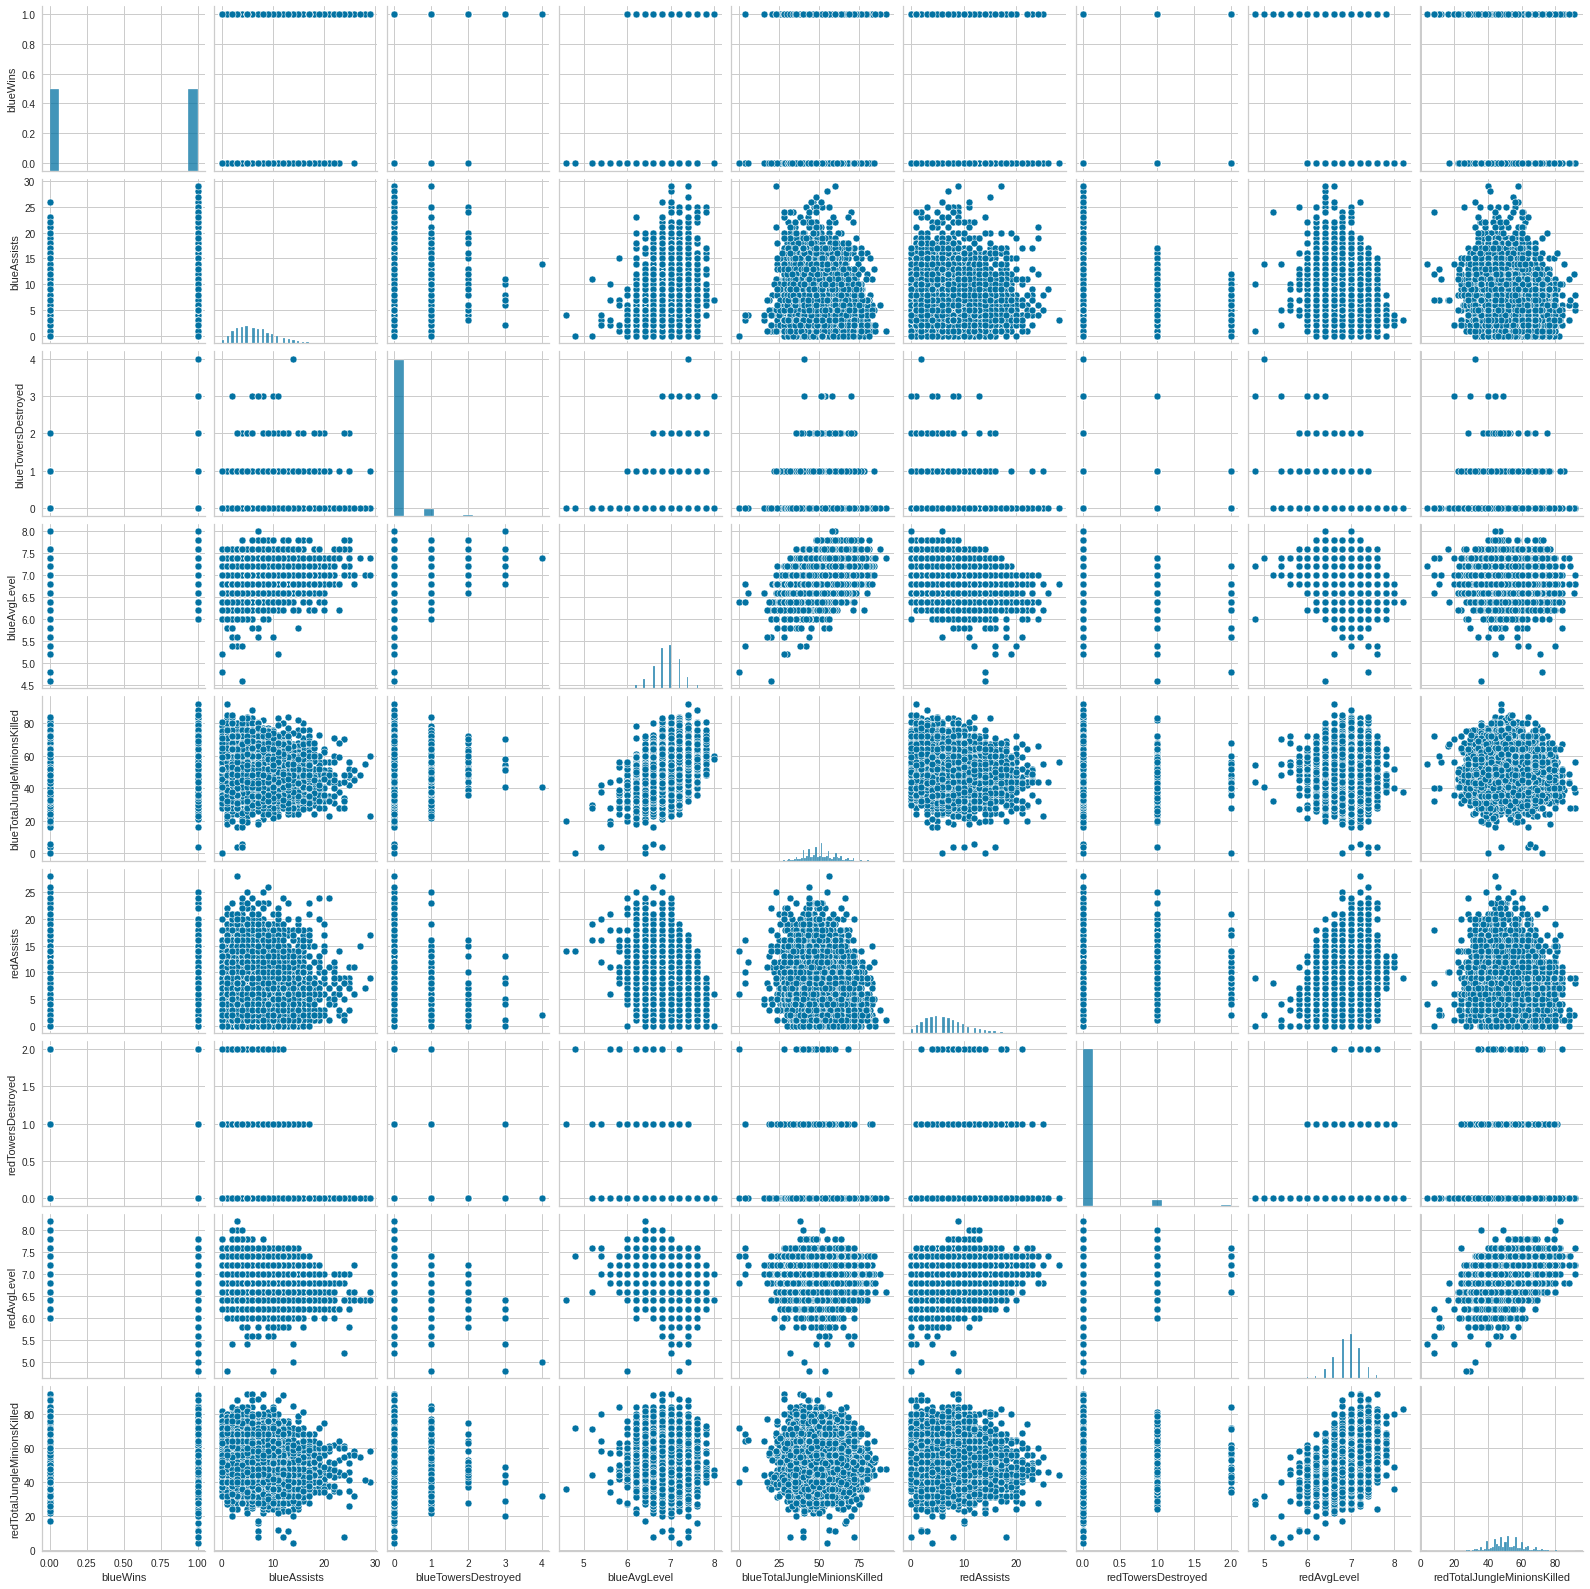

In [52]:
sns.pairplot(data_pd)

From the plot we can tell there are no linear relation among the vairables

# H20 AutoML Rexecution on new model

FIrst, we drop some variables which have Multicollinearity

In [67]:
data_h2o=dfpd[['blueWins', 'blueAssists', 'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalJungleMinionsKilled','redAssists','redTowersDestroyed','redAvgLevel','redTotalJungleMinionsKilled']]
data_h2o['blueWins'] = data_h2o['blueWins'].asfactor()

In [68]:
df1_train, df1_test = data_h2o.split_frame([pct_rows])

In [69]:
X1 = data_h2o.columns
print(X1)

['blueWins', 'blueAssists', 'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalJungleMinionsKilled', 'redAssists', 'redTowersDestroyed', 'redAvgLevel', 'redTotalJungleMinionsKilled']


In [70]:
# Seperate Dependent variable from Independent variable
y1_numeric = "blueWins"
X1.remove(y1_numeric)
print(X1)

['blueAssists', 'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalJungleMinionsKilled', 'redAssists', 'redTowersDestroyed', 'redAvgLevel', 'redTotalJungleMinionsKilled']


In [71]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [72]:
aml1.train(x=X1, y=y1_numeric, training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_4_20230219_225224


GLM Model: summary
    family    link    regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.002094 )  nlambda = 30, lambda.max = 17.863, lambda.min = 0.002094, lambda.1se = 0.02267  8                             8                              36                      AutoML_4_20230219_225224_training_py_517_sid_9e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18924574087384877
RMSE: 0.43502383943164397
LogLoss: 0.5573673468961626
AUC: 0.7841177960515608
AUCPR: 0.7794663015621908
Gini: 0.5682355921031217
Null degrees of freedom: 7931
Residual degrees of freedom: 7923
Null deviance: 10996.084855257146
Residual deviance: 8842.075591160723
AIC: 8860.075591160723

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3569895291495541
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2014  1954  0.4924   (1954.0/3968.0)
1      524   3440  0.1322   (524.0/3964.0)
Total  2538  5394  0.3124   (2478.0/7932.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.35699      0.7352    264
max f2                       0.198861     0.846015  333
max f0point5                 0.585892     0.718826  160
max accuracy                 0.518181     0.710792  191
max precision                0.995062     1         0
max recall                   0.0365615    1         392
max specificity              0.995062     1         0
max absolute_mcc             0.518181     0.422015  191
max min_per_class_accuracy   0.498804     0.706653  200
max mean_per_class_accuracy  0.518181     0.71078   191
max tns                      0.995062     3968      0
max fns                      0.995062     3959      0
max fps                      0.00150497   3968      399
max tps                      0.0365615    3964      392
max tnr                      0.995062     1         0
max fnr                      0.995062     0.998739  0
max fpr                      0.00150497   1         399
max tpr                      0.0365615    1         392

Gains/Lift Table: Avg response rate: 49.97 %, avg score: 49.97 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.956506           1.976     1.976              0.9875           0.974811  0.9875                      0.974811            0.0199294       0.0199294                  97.5996   97.5996            0.0196773
2        0.0200454                   0.936597           1.89969   1.93808            0.949367         0.946275  0.968553                    0.960633            0.0189203       0.0388496                  89.9692   93.8084            0.0375896
3        0.030005                    0.9207             1.77305   1.8833             0.886076         0.928981  0.941176                    0.950127            0.0176589       0.0565086                  

In [73]:
print(aml1.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
GLM_1_AutoML_4_20230219_225224                           0.782829   0.558745  0.778059                0.315842  0.435658  0.189797
StackedEnsemble_BestOfFamily_1_AutoML_4_20230219_225224  0.782828   0.558856  0.777719                0.31647   0.435648  0.189789
StackedEnsemble_BestOfFamily_4_AutoML_4_20230219_225224  0.782795   0.55861   0.77848                 0.313323  0.435631  0.189774
StackedEnsemble_AllModels_3_AutoML_4_20230219_225224     0.782567   0.558996  0.778211                0.314457  0.435775  0.1899
StackedEnsemble_AllModels_2_AutoML_4_20230219_225224     0.782489   0.558934  0.777934                0.319363  0.435791  0.189913
StackedEnsemble_AllModels_1_AutoML_4_20230219_225224     0.782444   0.559     0.777969                0.322259  0.435825  0.189943
StackedEnsemble_BestOfFamily_3_AutoML_4_20230219_225224  0.782254   0.559322  0.77779

In [74]:
model_index = 0
glm_index = 0
glm_model = ""
aml1_leaderboard_df1 = aml1.leaderboard.as_data_frame()
models_dict = {}
for m in aml1_leaderboard_df1["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml1_leaderboard_df1["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'GLM_1_AutoML_4_20230219_225224': 0}

In [75]:
# print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index, "model_id"])

0


In [76]:
best_model1.algo

'glm'

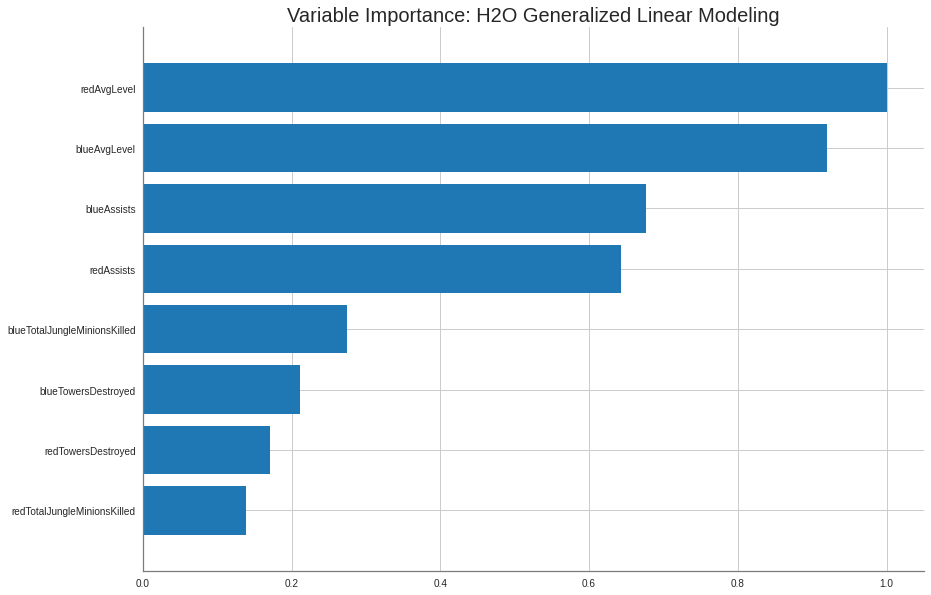

<Figure size 576x396 with 0 Axes>

In [77]:
# plot variables in order of their importance for price prediction
if best_model1.algo in ["glm", "drf", "xrt", "xgboost"]:
    best_model1.varimp_plot()

In [78]:
if glm_index is not 0:
    print(glm_index)
    glm_model1 = h2o.get_model(aml1.leaderboard[glm_index, "model_id"])
    print(glm_model1.algo)
    glm_model1.std_coef_plot()

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GLM_1_AutoML_4_20230219_225224 on column 'blueAssists'.
blueassists    mean_response    stddev_response    std_error_mean_response
-------------  ---------------  -----------------  -------------------------
0              0.381909         0.212168           0.00213463
1.52632        0.40886          0.216192           0.00217512
3.05263        0.436285         0.219308           0.00220647
4.57895        0.46404          0.221468           0.0022282
6.10526        0.491971         0.222643           0.00224002
7.63158        0.519923         0.222815           0.00224176
9.15789        0.54774          0.221987           0.00223342
10.6842        0.57527          0.220173           0.00221518
12.2105        0.602368         0.217407           0.00218734
13.7368        0.628897         0.213733           0.00215038
15.2632        0.654728         0.20921            0.00210487
16.7895        0.679749         0.203908           0.00205

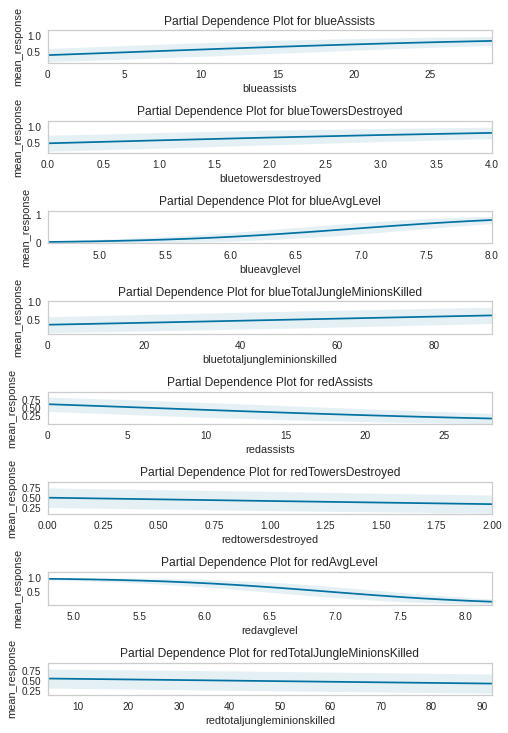

In [79]:
best_model1.partial_plot(
    data_h2o,
    cols=['blueAssists', 'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalJungleMinionsKilled','redAssists','redTowersDestroyed','redAvgLevel','redTotalJungleMinionsKilled'],
)

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

1. The dependent/response variable is binary or dichotomous

2. Little or no multicollinearity between the predictor/explanatory variables

3. Linear relationship of independent variables to log odds

4. Problem with extreme outliers



From the above code running results, we can see that this data set does not violate these premises



# Ridge Regularization in H20

In [80]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

house_glm = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0, compute_p_values=True
)
house_glm_regularization = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0.001, alpha=0
)

In [81]:
house_glm_regularization.train(x=X1, y=y1_numeric, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676845228422_11973


GLM Model: summary
    family    link    regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 0.001 )  8                             8                              4                       py_517_sid_9e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18924466538696558
RMSE: 0.43502260330581166
LogLoss: 0.5573598915065786
AUC: 0.7841410967355392
AUCPR: 0.7794055861109682
Gini: 0.5682821934710784
Null degrees of freedom: 7931
Residual degrees of freedom: 7923
Null deviance: 10996.084855257146
Residual deviance: 8841.95731886036
AIC: 8859.95731886036

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.355773062504098
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2013  1955  0.4927   (1955.0/3968.0)
1      521   3443  0.1314   (521.0/3964.0)
Total  2534  5398  0.3122   (2476.0/7932.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.355773     0.735527  264
max f2                       0.19803      0.845907  334
max f0point5                 0.58683      0.718612  161
max accuracy                 0.518693     0.710918  190
max precision                0.995189     1         0
max recall                   0.0359784    1         392
max specificity              0.995189     1         0
max absolute_mcc             0.518693     0.422291  190
max min_per_class_accuracy   0.499077     0.706653  198
max mean_per_class_accuracy  0.518693     0.710906  190
max tns                      0.995189     3968      0
max fns                      0.995189     3959      0
max fps                      0.00145775   3968      399
max tps                      0.0359784    3964      392
max tnr                      0.995189     1         0
max fnr                      0.995189     0.998739  0
max fpr                      0.00145775   1         399
max tpr                      0.0359784    1         392

Gains/Lift Table: Avg response rate: 49.97 %, avg score: 49.97 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.95713            1.976     1.976              0.9875           0.975266  0.9875                      0.975266            0.0199294       0.0199294                  97.5996   97.5996            0.0196773
2        0.0200454                   0.937411           1.89969   1.93808            0.949367         0.947034  0.968553                    0.961239            0.0189203       0.0388496                  89.9692   93.8084            0.0375896
3        0.030005                    0.921714           1.77305   1.8833             0.886076         0.929888  0.941176                    0.950833            0.0176589       0.0565086                  77.3046   88.3303            0.0529804
4        0.0400908                   0.907223           1.90096   1.88774            0.95             0.914269  0.943396                    0.941634            0.0191726       0.0756811                  90.0959   88.7744            0.0711448
5        0.0500504              

In [82]:
# Model details without regularization
house_glm.train(x=X1, y=y1_numeric, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676845228422_11975


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              8                             8                              4                       py_517_sid_9e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18924502003999552
RMSE: 0.4350230109316006
LogLoss: 0.5573576551819257
AUC: 0.7841175417466879
AUCPR: 0.7793781932828264
Gini: 0.5682350834933758
Null degrees of freedom: 7931
Residual degrees of freedom: 7923
Null deviance: 10996.084855257146
Residual deviance: 8841.92184180607
AIC: 8859.92184180607

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35613286850837383
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2018  1950  0.4914   (1950.0/3968.0)
1      524   3440  0.1322   (524.0/3964.0)
Total  2542  5390  0.3119   (2474.0/7932.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.356133     0.735514  265
max f2                       0.196369     0.845941  334
max f0point5                 0.588176     0.718658  161
max accuracy                 0.518544     0.71054   192
max precision                0.994521     1         0
max recall                   0.0354461    1         392
max specificity              0.994521     1         0
max absolute_mcc             0.518544     0.421519  192
max min_per_class_accuracy   0.499378     0.707409  201
max mean_per_class_accuracy  0.518544     0.710528  192
max tns                      0.994521     3968      0
max fns                      0.994521     3957      0
max fps                      0.00141553   3968      399
max tps                      0.0354461    3964      392
max tnr                      0.994521     1         0
max fnr                      0.994521     0.998234  0
max fpr                      0.00141553   1         399
max tpr                      0.0354461    1         392

Gains/Lift Table: Avg response rate: 49.97 %, avg score:  7.75 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.189192           1.22562   1.22562            0.6125           0.263717   0.6125                      0.263717            0.0123613       0.0123613                  22.5618   22.5618            0.00454875
2        0.0200454                   0.163327           0.98784   1.10748            0.493671         0.173249   0.553459                    0.218768            0.00983855      0.0221998                  -1.21601  10.7477            0.00430665
3        0.030005                    0.155934           0.65856   0.958467           0.329114         0.159807   0.478992                    0.199197            0.00655903      0.0287588                  -34.144   -4.15335           -0.00249117
4        0.0400908                   0.151623           0.825416  0.924995           0.4125           0.153674   0.462264                    0.187744            0.00832492      0.0370838                  -17.4584  -7.50052           -0.006011
5        0.0500504                   0.148438

In [83]:
coeff_table = house_glm._model_json["output"]["coefficients_table"]

In [84]:
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,0.682238,0.997300,0.684084,4.939219e-01,-0.000894
1,blueAssists,0.092171,0.007650,12.048248,1.981154e-33,0.375403
2,blueTowersDestroyed,0.475953,0.129526,3.674586,2.382352e-04,0.117087
3,blueAvgLevel,1.669586,0.111579,14.963328,1.274876e-50,0.512748
4,blueTotalJungleMinionsKilled,0.015361,0.002978,5.159137,2.480906e-07,0.151782
5,redAssists,-0.087379,0.007643,-11.432498,2.877118e-30,-0.356209
6,redTowersDestroyed,-0.433496,0.141912,-3.054694,2.252902e-03,-0.094502
7,redAvgLevel,-1.827827,0.112176,-16.294228,1.084640e-59,-0.558135
8,redTotalJungleMinionsKilled,-0.007437,0.002904,-2.561234,1.043010e-02,-0.075469


# Data Report

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_1_AutoML_4_20230219_225224_model_2,0.777277,0.576424,0.774854,0.313217,0.440483,0.194025,430,0.010682,DeepLearning
StackedEnsemble_BestOfFamily_3_AutoML_4_20230219_225224,0.777116,0.566195,0.775396,0.293711,0.43848,0.192265,1449,0.040047,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_4_20230219_225224,0.777101,0.566214,0.775285,0.292214,0.438525,0.192304,1083,0.082859,StackedEnsemble
GLM_1_AutoML_4_20230219_225224,0.777049,0.565444,0.775877,0.300736,0.438529,0.192307,177,0.006482,GLM
StackedEnsemble_AllModels_1_AutoML_4_20230219_225224,0.776869,0.56644,0.775156,0.293217,0.438594,0.192364,705,0.030266,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_4_20230219_225224,0.776861,0.56644,0.775152,0.293217,0.438594,0.192364,684,0.030288,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_4_20230219_225224,0.776668,0.56567,0.775454,0.29121,0.438681,0.192441,610,0.016983,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_4_20230219_225224,0.776374,0.566258,0.774459,0.304734,0.438732,0.192486,1687,0.063803,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_4_20230219_225224,0.776236,0.5664,0.774263,0.294746,0.438782,0.19253,873,0.051569,StackedEnsemble
DeepLearning_1_AutoML_4_20230219_225224,0.77598,0.571882,0.772038,0.314236,0.441647,0.195052,1165,0.007843,DeepLearning


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_4_20230219_225224

,0,1,Error,Rate
0,590.0,391.0,0.3986,(391.0/981.0)
1,196.0,770.0,0.2029,(196.0/966.0)
Total,786.0,1161.0,0.3015,(587.0/1947.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

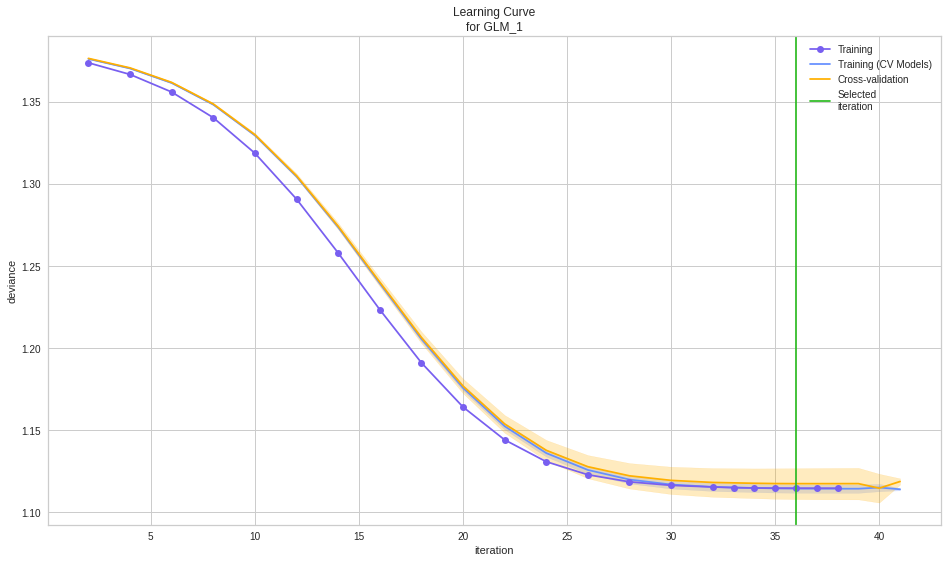

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

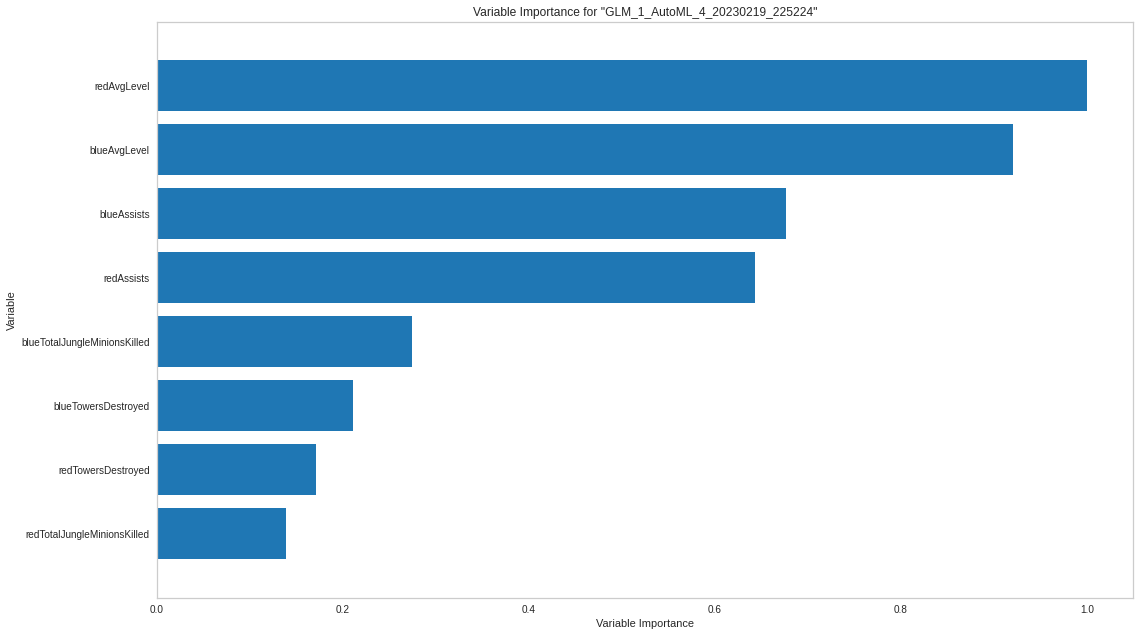

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

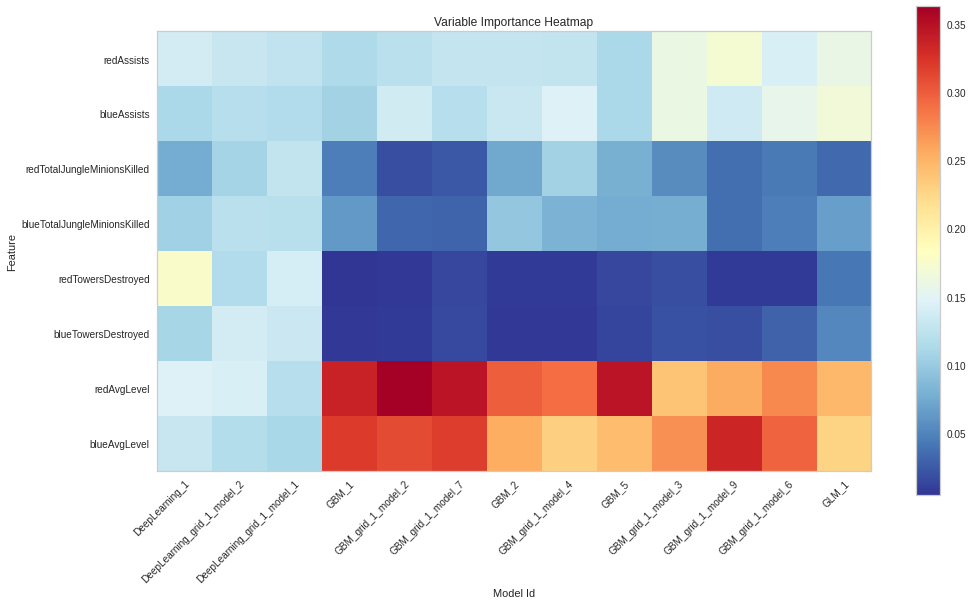

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

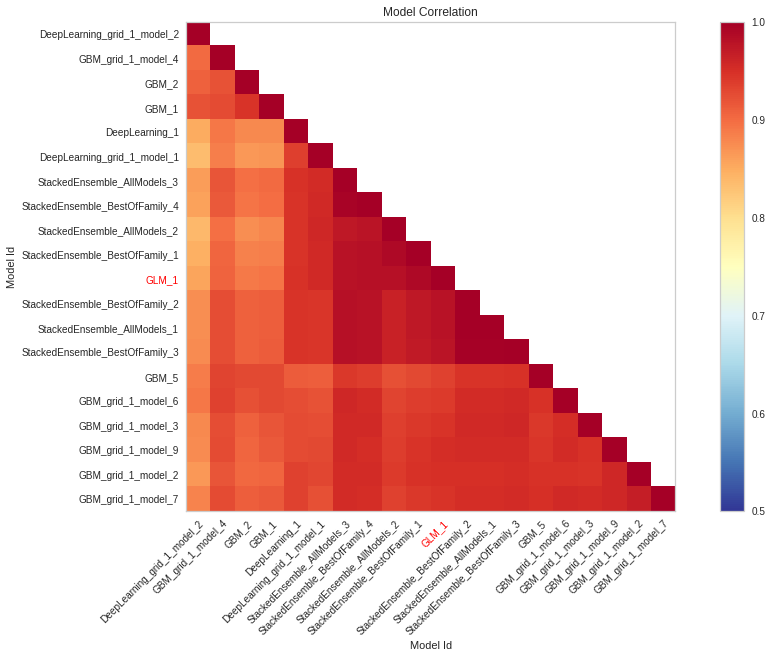

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

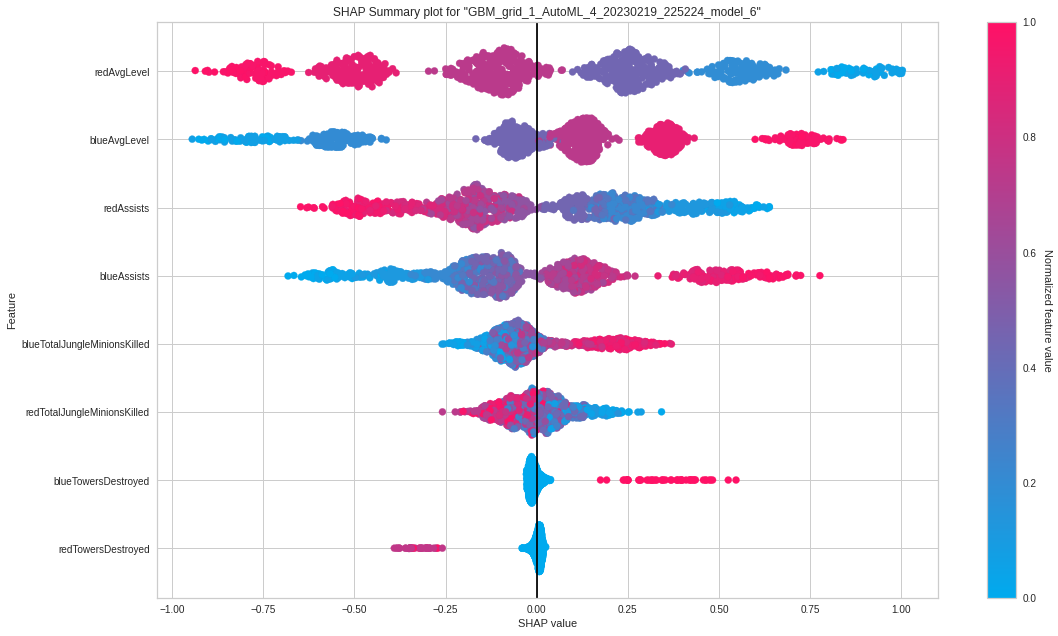

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

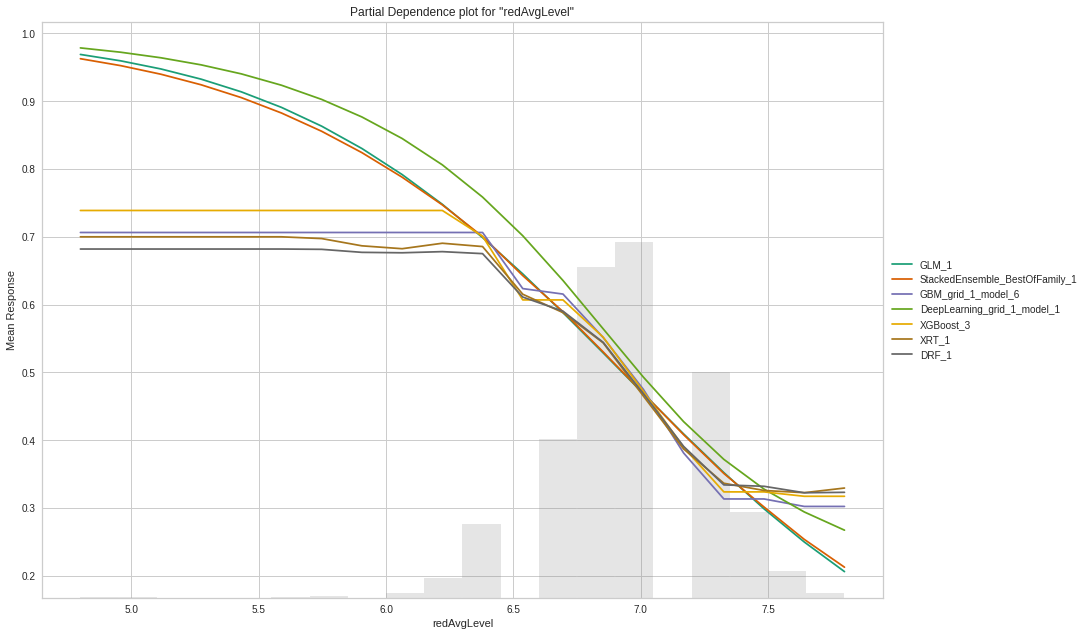

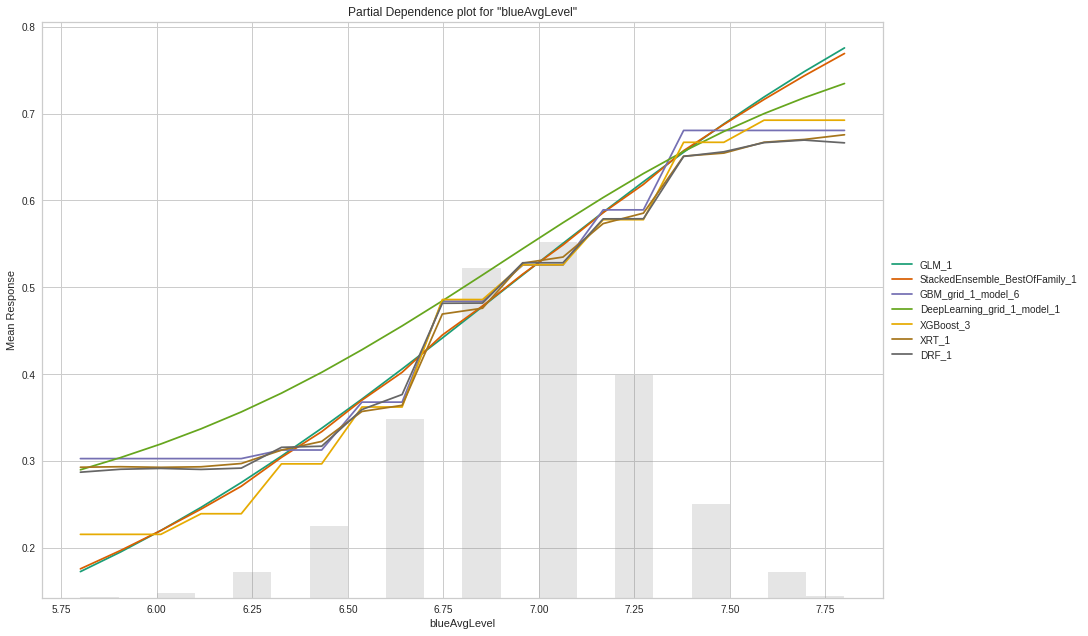

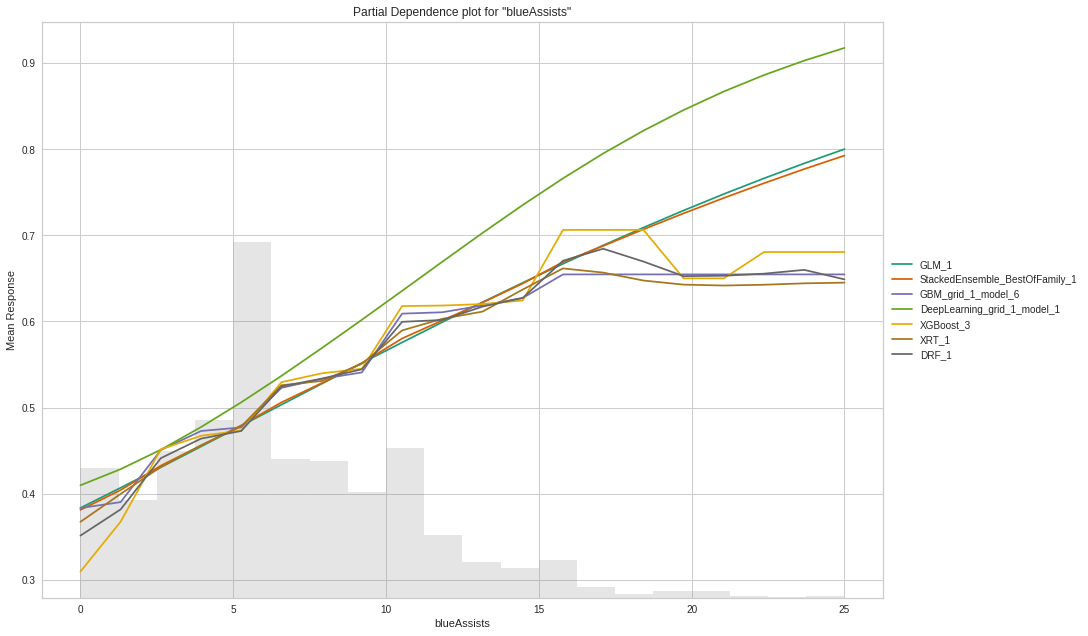

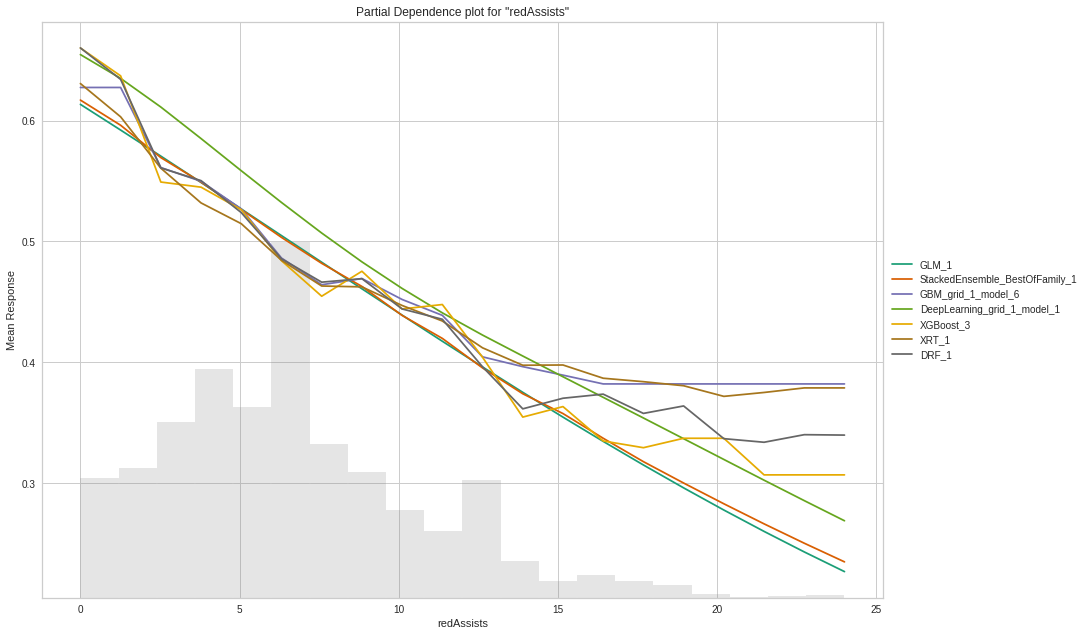

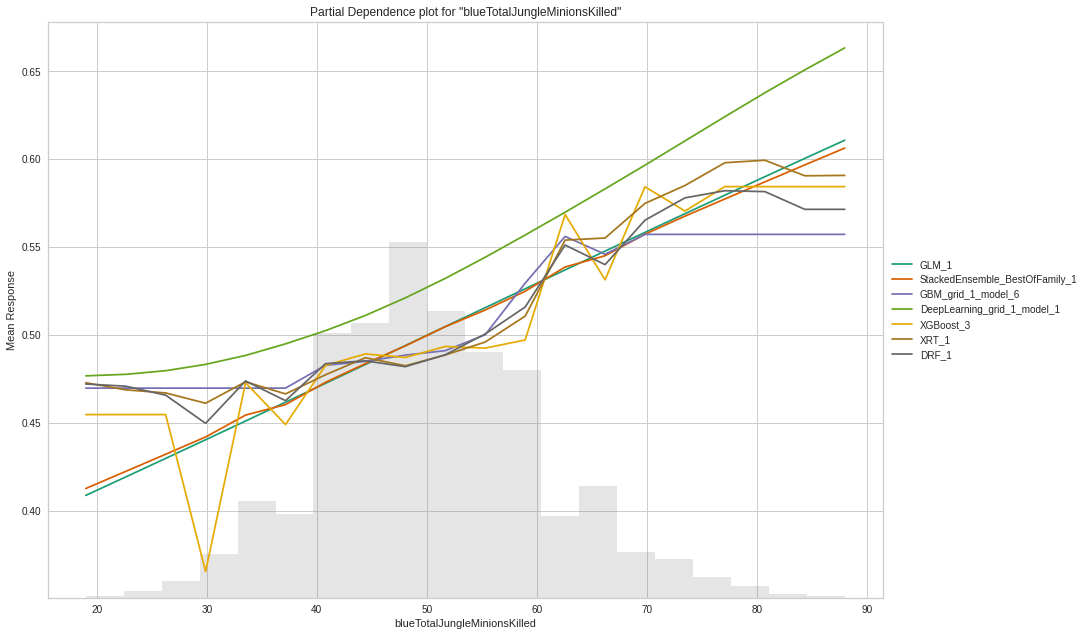

In [85]:
exa = aml1.explain(df1_test)

In [86]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues
calculate_pvalues(data_pd)

,blueWins,blueAssists,blueTowersDestroyed,blueAvgLevel,blueTotalJungleMinionsKilled,redAssists,redTowersDestroyed,redAvgLevel,redTotalJungleMinionsKilled
blueWins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blueAssists,0.0,0.0,0.0,0.0,0.0,0.4572,0.0,0.0,0.0
blueTowersDestroyed,0.0,0.0,0.0,0.0,0.4171,0.0003,0.2434,0.0,0.0001
blueAvgLevel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192
blueTotalJungleMinionsKilled,0.0,0.0,0.4171,0.0,0.0,0.0,0.0,0.1677,0.0088
redAssists,0.0,0.4572,0.0003,0.0,0.0,0.0,0.0,0.0,0.0
redTowersDestroyed,0.0,0.0,0.2434,0.0,0.0,0.0,0.0,0.0,0.5265
redAvgLevel,0.0,0.0,0.0,0.0,0.1677,0.0,0.0,0.0,0.0
redTotalJungleMinionsKilled,0.0,0.0,0.0001,0.192,0.0088,0.0,0.5265,0.0,0.0


# Hyperparameter Tuning

In [87]:
s = data_pd["blueWins"]

t = data_pd.drop(["blueWins"], axis=1)
     


In [88]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
     

In [89]:
t_train, t_test, s_train, s_test = train_test_split(
    t, s, random_state=101, test_size=0.2
)
     

In [90]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {
    "max_depth": [200, 500, 800, 1100],
    "n_estimators": [100, 200, 300, 400],
    "min_samples_split": [2, 3, 5],
}

random_rf = RandomizedSearchCV(
    estimator=mode,
    param_distributions=param_vals,
    n_iter=10,
    scoring="accuracy",
    cv=5,
    refit=True,
    n_jobs=-1,
)

# Training and prediction


random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [91]:
random_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 200}

# Questions

* Is the relationship significant?

From the significance detection above, we can see that the data is significant

* Are any model assumptions violated?

From the data report above, we can see that there is no violation of the premise of logistic regression

* Is there any multicollinearity in the model?

From the VIF detection above, we know that some variables have multicollinearity, so we drop them

* In the multivariate models are predictor variables independent of all the other predictor variables?
Yes, all variables are independent of each other

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

The variables are ranked as follow

1.   redAvgLevel
2.   blueAvgLevel
3.   blueAssists
4.   redAssists
5.   blueTotalJungleMinionsKilled
6.   blueTowersDestroyed
7.   redTowersDestroyed
8.   redTotalJungleMinionsKilled

The remaining variables have been discarded because collinearity or p-value is too high

* Does the model make sense?

Yes, these variables can well reflect the overall advantages of a team in the first ten minutes of the game, and they are independent of each other. These advantages can be translated into the final victory of a game

* Does regularization help?

No,it was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

* Which independent variables are significant?
All remaining variables that were not discarded were significant

* Which hyperparameters are important?
The best hyperparameters for this model are:
{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 200}

# LICENSE
MIT License

Copyright (c) 2022 Sanika Patne

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# REFERENCES
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression

Dataset- https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

AutoML Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb